#MEAN REVERSION STRATEGY:
Mean reversion is a popular trading strategy that is based on the idea that asset prices tend to revert
to their historical means over time. This strategy involves identifying assets that are undervalued or
overvalued and betting that they will return to their historical means.

<Axes: title={'center': 'Stock Price'}>

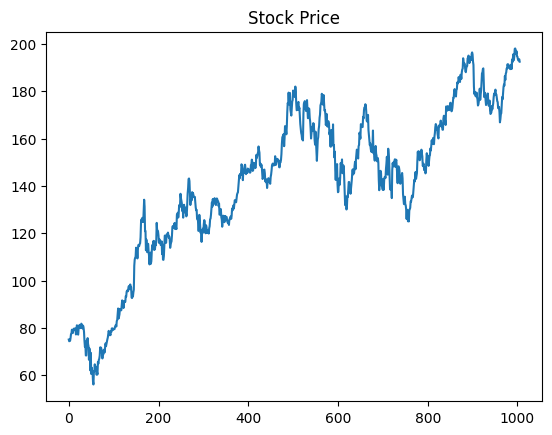

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
symbol = 'AAPL'  # Stock symbol
start_date = '2020-01-01'  # Start date for historical data
end_date = '2023-01-01'  # End date for historical data
window = 20  # Window period for mean and standard deviation
z_threshold = 2.5 # Z-score threshold for buy/sell signals

# Step 1: Collect Historical Data
data= pd.read_csv('AAPL.csv')
data.head()
data['Close'].plot(title='Stock Price')


Buy signal is generated when price moves above 2.5 times standard deviation from mean and sell signal is generated when the price moves below 2.5 times standard deviation from the mean.

In [136]:

# Step 2: Calculate Mean and Standard Deviation
data['Mean'] = data['Close'].rolling(window=window).mean()
data['Std'] = data['Close'].rolling(window=window).std()

# Step 3: Calculate Z-score
data['Z-score'] = (data['Close'] - data['Mean']) / data['Std']

# Generate Signals
data['Signal'] = 0
data['Signal'] = np.where(data['Z-score'] > z_threshold, -1, data['Signal'])
data['Signal'] = np.where(data['Z-score'] < -z_threshold, 1, data['Signal'])

data['Position'] = data['Signal'].shift()

In [137]:
# Step 4: Backtest the Strategy
initial_capital = 100000
data['Cash']=0
data['Cash'].iloc[0]=100000
capital = initial_capital
data['Holdings']=0
#print(data.head())
# Simulate trading
for i in range(1, len(data)):
    if data['Position'].iloc[i] == 1 and data['Position'].iloc[i-1] != 1:  # Buy signal
        shares_to_buy = data['Cash'].iloc[i-1] // data['Close'].iloc[i]
        if shares_to_buy > 0:
            capital = 0
            data['Holdings'].iloc[i] = shares_to_buy
            data['Cash'].iloc[i]=0
        else:
            data['Holdings'].iloc[i] = data['Holdings'].iloc[i-1]
            data['Cash'].iloc[i]=data['Cash'].iloc[i-1]
            
    elif data['Position'].iloc[i] == -1 and data['Position'].iloc[i-1] != -1:  # Sell signal
        shares_to_sell = data['Holdings'].iloc[i-1]
        if shares_to_sell > 0:
            capital = shares_to_sell * data['Close'].iloc[i]
            data['Holdings'][i] = 0
            data['Cash'].iloc[i]=capital
        else:
            data['Holdings'].iloc[i] = data['Holdings'].iloc[i-1]
            data['Cash'].iloc[i]=data['Cash'].iloc[i-1]
    else:
        data['Holdings'].iloc[i] = data['Holdings'].iloc[i-1]
        data['Cash'].iloc[i]=data['Cash'].iloc[i-1]


    # Update portfolio value
data['Portfolio'] = data['Cash'] + data['Holdings'] * data['Close']


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24312\2240432416.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Cash'].iloc[0]=100000
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24312\2240432416.py:4: SettingWithCopyWarning: 
A value 

Below we generate the graph of our portfolio value over the time

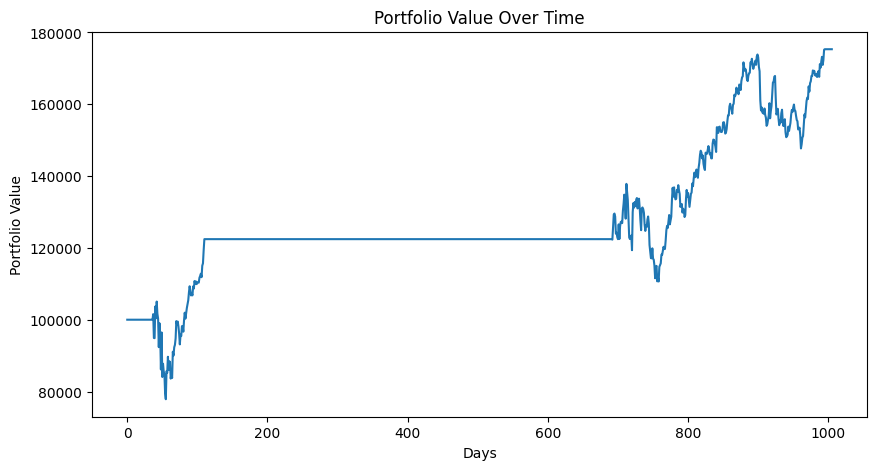

Final Portfolio Value: $175327.35


In [138]:
# Step 5: Analyze Results
# Plot the portfolio value over time
plt.figure(figsize=(10, 5))
plt.plot(data['Portfolio'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.show()

# Print final portfolio value
final_value = data['Portfolio'].iloc[-1]
print(f'Final Portfolio Value: ${final_value:.2f}')

Initial capital: $100000.00
Final Portfolio value: $175327.35

Below we can see the buy and sell signals generated over time

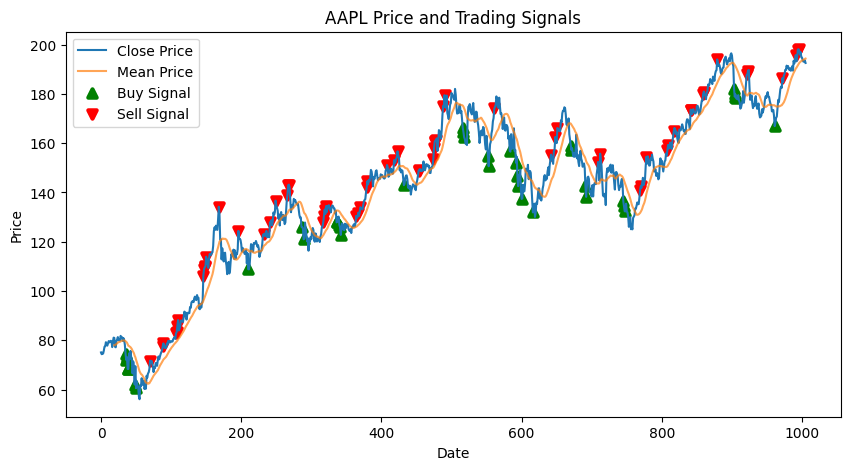

In [124]:

# Plot buy and sell signals
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Mean'], label='Mean Price', alpha=0.7)
plt.scatter(data.loc[data['Signal'] == 1].index, 
            data['Close'][data['Signal'] == 1], 
            marker='^', color='g', lw=3, label='Buy Signal')
plt.scatter(data.loc[data['Signal'] == -1].index, 
            data['Close'][data['Signal'] == -1], 
            marker='v', color='r', lw=3, label='Sell Signal')
plt.title(f'{symbol} Price and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
